<a href="https://colab.research.google.com/github/Omarnot2far/projects/blob/main/learn_2_fC_camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create nural natwork to check female indiam has deabetics or not based on the data given

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # scaling all the columns in same scale 
from imblearn.over_sampling import RandomOverSampler # to balance the len og of Output columns of two values

import tensorflow as tf
import tensorflow_hub as hub


In [3]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df['Outcome']==1

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

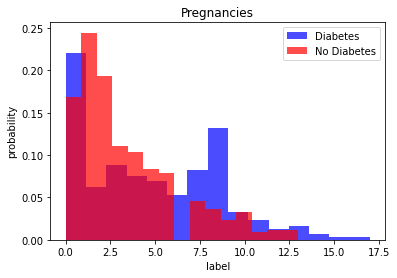

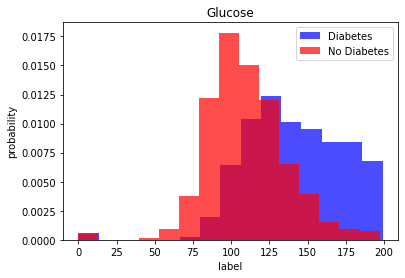

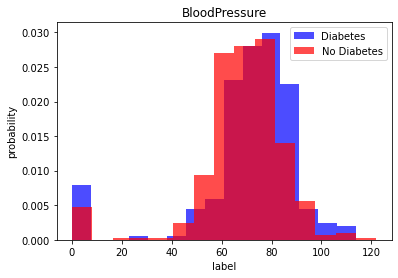

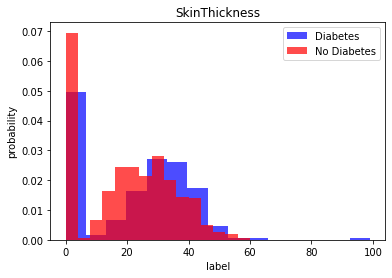

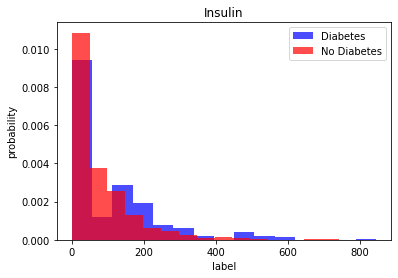

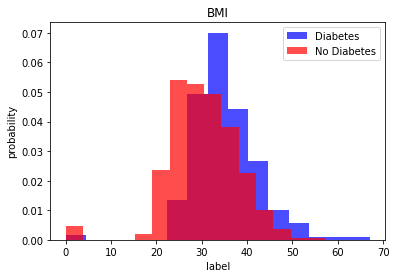

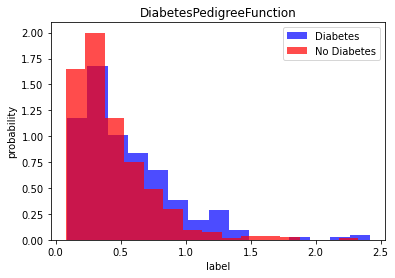

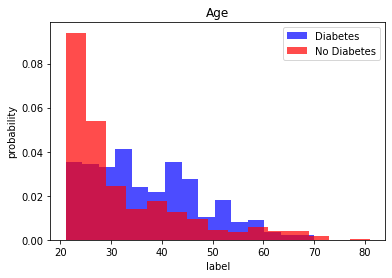

In [12]:
# create histogram to compare the outcome column and for this reason create for loop
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes',alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes',alpha=0.7,density=True, bins=15)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel('label')
  plt.legend()
  plt.show()

In [34]:
x = df[df.columns[:-1]].values  #not the last columns
y = df[df.columns[-1]].values

In [37]:
 # x is two dimensional data whereas y is one dimensional data 
 #so we need Y to reshape in two dimensional

 x.shape, y.shape

((768, 8), (768,))

In [35]:
# Standard Scalar to Scale the quantity

scaler = StandardScaler()
x = scaler.fit_transform(x)
x


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [40]:
# see the data and reshape the y into two dimensional

data = np.hstack((x, np.reshape(y,(-1,1))))# hstack=stack arrays in sequence horizontally (column wise)
transformed_df = pd.DataFrame(data, columns=df.columns)

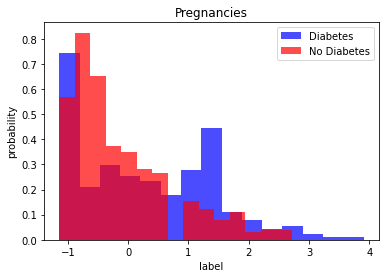

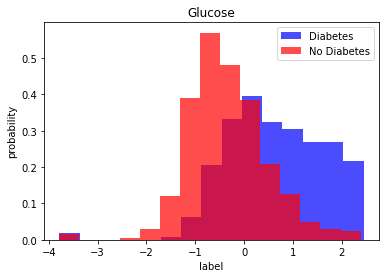

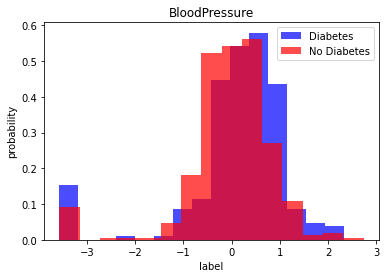

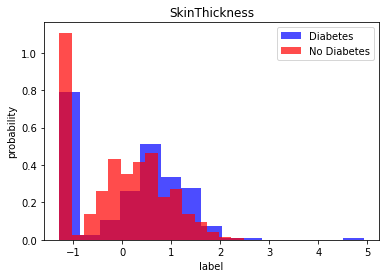

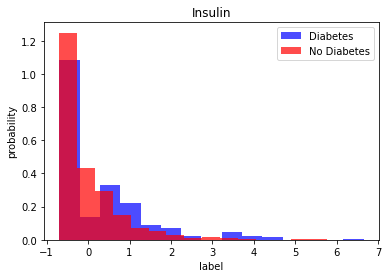

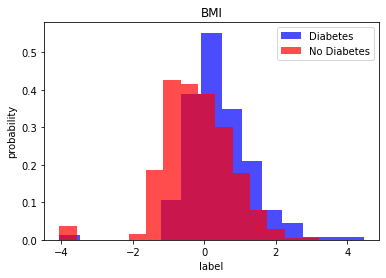

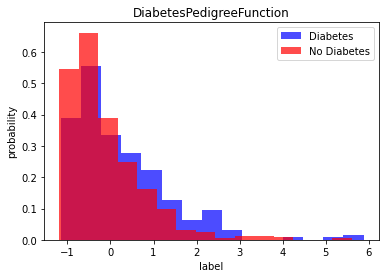

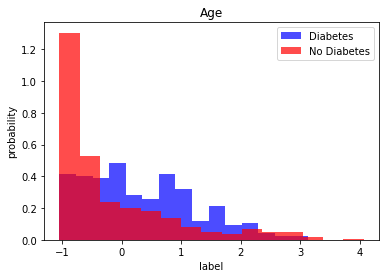

In [41]:
# see the data in hist again & transformed_df instead df

for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label='Diabetes',alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label='No Diabetes',alpha=0.7,density=True, bins=15)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel('label')
  plt.legend()
  plt.show()

In [48]:
# 
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y,(-1,1))))# hstack=stack arrays in sequence horizontally (column wise)
transformed_df = pd.DataFrame(data, columns=df.columns)

In [49]:
# see the Outcome column has difference len & before it was 500, 238 

len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [50]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0) #use 60% for training, 20% for test and 20% for validation
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0) # breaking down 50/50 for validation in the test dataset

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # relu=Applies the rectified linear unit activation function
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # it maps probabilty o or 1 
])

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss= tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])

In [53]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.5283


[0.7121705412864685, 0.528333306312561]

In [54]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5850


[0.6849563717842102, 0.5849999785423279]

In [55]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 6ms/step - loss: 0.6790 - accuracy: 0.5550 - val_loss: 0.6233 - val_accuracy: 0.6850
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.6207 - accuracy: 0.6733 - val_loss: 0.5806 - val_accuracy: 0.7350
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5819 - accuracy: 0.7250 - val_loss: 0.5455 - val_accuracy: 0.7250
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5527 - accuracy: 0.7500 - val_loss: 0.5212 - val_accuracy: 0.7650
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.7517 - val_loss: 0.5013 - val_accuracy: 0.7750
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7517 - val_loss: 0.4870 - val_accuracy: 0.7750
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5141 - accuracy: 0.7617 - val_loss: 0.4791 - val_accuracy: 0.7850
Epoch 8/20
38/38 [==

In [56]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7550


[0.4524199366569519, 0.7549999952316284]

**Scale the values**

the accuracy is low because our data set all the feature has different values. column BMI has 0 to 2.5 values where other has kind of different. so need to import a library to preposses this in Standard scaler. see before where standard scalar

** Randomoversampler **

remember the Outcome colum where diabetics and non diabetics value count was 268, 500 which has huge game between two label and this might be causing 
neural not working properly, thats why we try to do these equal  with Randomoversampler. look above

